# About Dataset

link  https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset


This dataset simulates loan applications and approval outcomes for 2,000 individuals. It contains demographic, financial, and employment-related attributes that can be used to predict whether a loan application will be approved or rejected.
It is ideal for practicing classification problems, credit risk modeling, and feature engineering for financial datasets.

## Imports

In [24]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
path = kagglehub.dataset_download("anishdevedward/loan-approval-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'loan-approval-dataset' dataset.
Path to dataset files: /kaggle/input/loan-approval-dataset


In [3]:
print(os.listdir(path))

['loan_approval.csv']


In [4]:
path = os.path.join(path,"loan_approval.csv")

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


## Exploring the data

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df["city"].value_counts()

,count
city,
North Joseph,4
Williamsstad,3
Port Christopher,3
Port Michael,3
Leeland,3
...,...
South Kaylee,1
Michaeltown,1
New Heather,1


## Preprocessing

In [10]:
df = df.drop("name",axis=1)

In [11]:
df = df.drop("city",axis=1)

In [12]:
df.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,False
1,44592,729,15446,28,55.0,False
2,33278,584,11189,13,45.0,False
3,127196,344,48823,29,50.0,False
4,66048,496,47174,4,25.0,False


In [14]:
df['loan_approved'] = df['loan_approved'].map({True: 1, False: 0})
display(df.head())

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810,389,39698,27,50.0,0
1,44592,729,15446,28,55.0,0
2,33278,584,11189,13,45.0,0
3,127196,344,48823,29,50.0,0
4,66048,496,47174,4,25.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          2000 non-null   int64  
 1   credit_score    2000 non-null   int64  
 2   loan_amount     2000 non-null   int64  
 3   years_employed  2000 non-null   int64  
 4   points          2000 non-null   float64
 5   loan_approved   2000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 93.9 KB


## Train Test Split

In [17]:
X = df.drop("loan_approved",axis=1)
y = df["loan_approved"]

In [20]:
X

,income,credit_score,loan_amount,years_employed,points
0,113810,389,39698,27,50.0
1,44592,729,15446,28,55.0
2,33278,584,11189,13,45.0
3,127196,344,48823,29,50.0
4,66048,496,47174,4,25.0
...,...,...,...,...,...
1995,92163,770,12251,13,85.0
1996,38799,635,48259,17,40.0
1997,41957,763,16752,5,60.0
1998,139022,360,24031,35,55.0


In [19]:
y

,loan_approved
0,0
1,0
2,0
3,0
4,0
...,...
1995,1
1996,0
1997,1
1998,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    train_size=0.75,
    random_state=42
)

In [23]:
rb = RobustScaler()

X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test)

In [28]:
from sklearn.metrics import  mean_absolute_error
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)



MAE: 0.2337755281785214


MAE = 0.2338
→ On average, your predictions are off by ~0.23 units

## Vooting and Stacking

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

here you can also extract the model and play with all params if you want to

In [32]:
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
svm_clf = SVC(probability=True)

In [33]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('gb', gb_clf), ('svm', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [35]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier()),
    ('svm', SVC(probability=True))
]


In [37]:
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

## Result of both voting and stacking

In [38]:
from sklearn.metrics import accuracy_score, classification_report

# Voting predictions
y_pred_voting = voting_clf.predict(X_test)

# Stacking predictions
y_pred_stacking = stacking_clf.predict(X_test)

print("=== Voting Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

print("=== Stacking Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))


=== Voting Classifier ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       222

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

=== Stacking Classifier ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       222

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## Confusion Matrix (to see misclassifications)

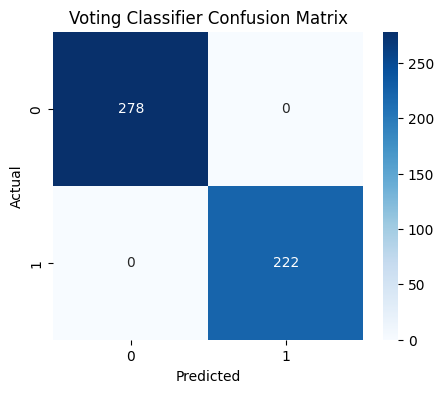

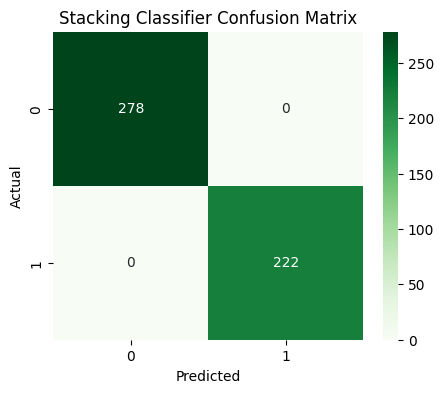

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Voting Confusion Matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(5,4))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap="Blues")
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Stacking Confusion Matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(5,4))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap="Greens")
plt.title("Stacking Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Compare in a Table

In [40]:
import pandas as pd

results = {
    "Model": ["Voting", "Stacking"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_voting),
        accuracy_score(y_test, y_pred_stacking)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


      Model  Accuracy
0    Voting       1.0
1  Stacking       1.0
